## Historical Simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
data = yf.download(
    'SPY',
    start = '2019-12-31',
    progress = False,
    interval = '1d',
    multi_level_index = False,
    auto_adjust = True
)

### 1. Lump-sum Simulation

In [8]:
lump_sum = data['Close'] / data['Close'].iloc[0] * 1000 # 투자를 처음 시작한 날의 가격으로 나눠준다

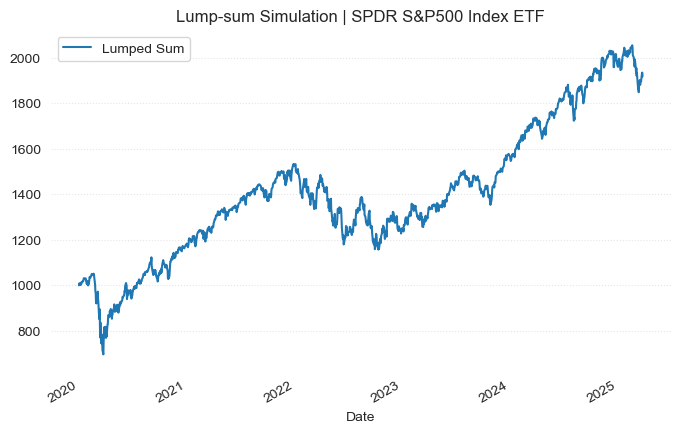

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
lump_sum.plot(ax = ax, label = 'Lumped Sum')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('Lump-sum Simulation | SPDR S&P500 Index ETF')
plt.show()

### 2. Installment

In [32]:
last_day_idx = data.groupby(data.index.to_period("M")).tail(1).index # 월 마지막 영업일

In [33]:
invest_amount = 100  # 매월 100달러씩 투자한다고 가정

investment_log = pd.DataFrame(
    dtype=float,
    index=last_day_idx,
    columns=[
        'investment_amount', 'net_purchase_amount',
        'num_security', 'cumsum_security',
        'price', 'average_purchase_price',
        'portfolio_value'
    ]
)

# 포트폴리오 가치
daily_portfolio = pd.DataFrame(index=data.index)
daily_portfolio['price'] = data['Close']
daily_portfolio['cumsum_security'] = 0.0
daily_portfolio['net_purchase_amount'] = 0.0
daily_portfolio['portfolio_value'] = 0.0

# 누적 변수
cumsum_security = 0
cumsum_amount = 0

for idx in data.index:
    if idx in last_day_idx:
        price = data.loc[idx, 'Close']
        num_security = invest_amount / price
        cumsum_security += num_security
        cumsum_amount += invest_amount

        investment_log.loc[idx, 'investment_amount'] = invest_amount
        investment_log.loc[idx, 'net_purchase_amount'] = cumsum_amount
        investment_log.loc[idx, 'num_security'] = num_security
        investment_log.loc[idx, 'cumsum_security'] = cumsum_security
        investment_log.loc[idx, 'price'] = price
        investment_log.loc[idx, 'average_purchase_price'] = cumsum_amount / cumsum_security
        investment_log.loc[idx, 'portfolio_value'] = cumsum_security * price

    # 일별로 포트폴리오 가치 업데이트
    daily_portfolio.loc[idx, 'cumsum_security'] = cumsum_security
    daily_portfolio.loc[idx, 'net_purchase_amount'] = cumsum_amount
    daily_portfolio.loc[idx, 'portfolio_value'] = cumsum_security * data.loc[idx, 'Close']

In [34]:
investment_log # 거래 기록

,investment_amount,net_purchase_amount,num_security,cumsum_security,price,average_purchase_price,portfolio_value
Date,,,,,,,
2019-12-31,100.0,100.0,0.336124,0.336124,297.509277,297.509277,100.000000
2020-01-31,100.0,200.0,0.336260,0.672384,297.389221,297.449237,199.959646
2020-02-28,100.0,300.0,0.365169,1.037552,273.846130,289.142077,284.129657
2020-03-31,100.0,400.0,0.417274,1.454826,239.650543,274.946884,348.649950
2020-04-30,100.0,500.0,0.370258,1.825084,270.082245,273.959987,492.922795
...,...,...,...,...,...,...,...
2024-11-29,100.0,6000.0,0.167021,15.378176,598.727661,390.163298,9207.339561
2024-12-31,100.0,6100.0,0.171138,15.549315,584.322266,392.300245,9085.810849
2025-01-31,100.0,6200.0,0.166662,15.715977,600.015015,394.502988,9429.822343


In [35]:
daily_portfolio

,price,cumsum_security,net_purchase_amount,portfolio_value
Date,,,,
2019-12-31,297.509277,0.336124,100.0,100.000000
2020-01-02,300.291534,0.336124,100.0,100.935183
2020-01-03,298.017731,0.336124,100.0,100.170903
2020-01-06,299.154663,0.336124,100.0,100.553054
2020-01-07,298.313538,0.336124,100.0,100.270331
...,...,...,...,...
2025-03-20,563.794006,15.884783,6300.0,8955.745298
2025-03-21,563.979980,15.884783,6300.0,8958.699457
2025-03-24,574.080017,15.884783,6300.0,9119.136344


In [37]:
installment = (daily_portfolio['portfolio_value'] / daily_portfolio['net_purchase_amount'])

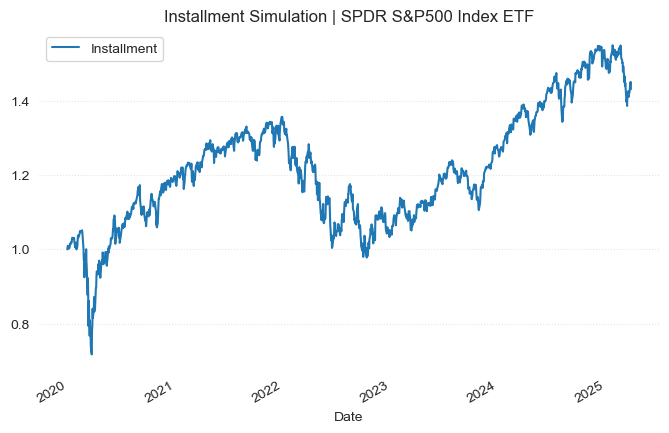

In [39]:
fig, ax = plt.subplots(figsize = (8, 5))
installment.plot(ax = ax, label = 'Installment')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.legend()
plt.title('Installment Simulation | SPDR S&P500 Index ETF')
plt.show()

### 3. Cost Average Simulation

### 4. Trading Costs

### 5. Asset Returns

#### 5.1 Simple Asset Return

#### 5.2 Internal Rate

#### 5.3 Time Weighted Average Return